# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。

## 1、提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要理解的关于这些战斗的问题，例如，哪一个区域发生了最多的战争？哪一个国王获得了最多的胜利？战争的胜利与否受那些关键因素的影响？



在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

**问题1**：攻防双方力量是否影响战局？

**问题2**：哪个区域交战较多？

**问题3**：以少胜多的一场战役？

**问题4**：作战方式以及对应胜率？

**问题5**：所有国王的胜率？

## 2、数据评估和清理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# TO DO: load the dataset
df = pd.read_csv('battles.csv')
df.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [3]:
# TO DO: check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

### 2.1 数据类型

In [4]:
# 发现defender_3 和defender_4 这两列数据本该是字符型变量
# 但是数据类型显示为float，这里更改为 object（虽然感觉没啥用，因为这两列数据全空）
df[['defender_3','defender_4']]=df[['defender_3','defender_4']].astype(object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null object
defender_4            0 non-null object
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null float

In [6]:
# 查看数值型数据描述性统计
df.describe()

,year,battle_number,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [7]:
# 查看分类型数据描述性统计
df.describe(include=[np.object])

,name,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,attacker_commander,defender_commander,location,region,note
count,38,36,35,38,10,3,2,37,2,0.0,0.0,37,37,37,28,37,38,5
unique,38,4,6,11,7,2,1,12,2,0.0,0.0,2,4,31,28,27,7,5
top,Battle of Oxcross,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,Mormont,Glover,Lannister,Baratheon,NaN,NaN,win,pitched battle,Gregor Clegane,"Edmure Tully, Jason Mallister, Karyl Vance",Winterfell,The Riverlands,Greyjoy's troop number based on the Battle of ...
freq,1,14,14,8,3,2,2,9,1,NaN,NaN,32,14,4,1,3,17,1


### 2.2 数据冗余

In [8]:
# 查看是否有数据冗余
sum(df.duplicated())

0

没有数据冗余

### 2.3 数据缺失

In [9]:
# 缺失值占比
df.isnull().sum()*100/df.shape[0]

name                    0.000000
year                    0.000000
battle_number           0.000000
attacker_king           5.263158
defender_king           7.894737
attacker_1              0.000000
attacker_2             73.684211
attacker_3             92.105263
attacker_4             94.736842
defender_1              2.631579
defender_2             94.736842
defender_3            100.000000
defender_4            100.000000
attacker_outcome        2.631579
battle_type             2.631579
major_death             2.631579
major_capture           2.631579
attacker_size          36.842105
defender_size          50.000000
attacker_commander      2.631579
defender_commander     26.315789
summer                  2.631579
location                2.631579
region                  0.000000
note                   86.842105
dtype: float64

In [10]:
# 非缺失值占比
df.notnull().sum()*100/df.shape[0]

name                  100.000000
year                  100.000000
battle_number         100.000000
attacker_king          94.736842
defender_king          92.105263
attacker_1            100.000000
attacker_2             26.315789
attacker_3              7.894737
attacker_4              5.263158
defender_1             97.368421
defender_2              5.263158
defender_3              0.000000
defender_4              0.000000
attacker_outcome       97.368421
battle_type            97.368421
major_death            97.368421
major_capture          97.368421
attacker_size          63.157895
defender_size          50.000000
attacker_commander     97.368421
defender_commander     73.684211
summer                 97.368421
location               97.368421
region                100.000000
note                   13.157895
dtype: float64

对于缺失值进行一个数据填充

对于数值型数据，列填充，以最大概率逼近的值填充，可以采用该列平均数，或者中位数填充缺失值

对于分类型数据，以最大概率逼近的值填充，可以采用该列众数来填充缺失值

但是这里我并没有按照以上方式进行填充，因为我发现，数据量较少，只有38行，且每类缺失值，都是一个与其他列相关的一个数值，我如果用本列的数据来进行一个填充的话，那么很可能会引入一些不恰当的值，所以这里我选择均不填充，更具体原因如下：


每场战役，对于attacker系列 有4个存储位，里面有些部分为空，那么可能是没有这么多的attacker，同样适用于defender


attacker_king，defender_king 这里我先放着，看后面是否需要再填充

对于attacker_outcome ，有一个缺失值，我也没填充，因为这个填充我不大好确定，attacker_outcome是由战场的很多因素导致的（如：指挥官，战斗方式等），同样适用于major_death，major_capture


battle_type 可能由地理位置和指挥官所决定，这里我也没有填充

attacker_size和defender_size，双方战力，这个是由当时所存兵力决定，不大好填充缺失值

attacker_commander 和 attacker_commander 双方指挥官，由当时所在指挥官决定，不大好填充缺失值

summer，location都只缺少1个，后面我并未对location分析，暂时没必要填充

### 2.4 意外发现

第28场战斗，Battle of Castle Black,数据中比较奇怪的是防守方国王居然是攻击方主要指挥官，这在逻辑上过不去，我查了下资料,发现此处确实有问题
http://asoiaf.huijiwiki.com/index.php?curid=4506

在Battle of Castle Black 这场战役中
#### attacker_king 应该为Mance Rayder
#### defender_king应该为Stannis Baratheon

In [11]:
df.iloc[27][['attacker_king','defender_king']]

attacker_king    Stannis Baratheon
defender_king         Mance Rayder
Name: 27, dtype: object

In [12]:
df.iloc[27][['attacker_commander','defender_commander']]

attacker_commander    Mance Rayder, Tormund Giantsbane, Harma Dogshe...
defender_commander    Stannis Baratheon, Jon Snow, Donal Noye, Cotte...
Name: 27, dtype: object

#### 这里我将数据中（Battle of Castle Black）的交战国王两者互换

In [13]:
df.loc[27,'attacker_king'] = 'Mance Rayder'
df.loc[27,'defender_king'] = 'Stannis Baratheon'

In [14]:
# 检查是否修改
df.loc[27][['attacker_king','defender_king']]

attacker_king         Mance Rayder
defender_king    Stannis Baratheon
Name: 27, dtype: object

In [15]:
df.loc[27]

name                                             Battle of Castle Black
year                                                                300
battle_number                                                        28
attacker_king                                              Mance Rayder
defender_king                                         Stannis Baratheon
attacker_1                                                    Free folk
attacker_2                                                       Thenns
attacker_3                                                       Giants
attacker_4                                                          NaN
defender_1                                                Night's Watch
defender_2                                                    Baratheon
defender_3                                                          NaN
defender_4                                                          NaN
attacker_outcome                                                

In [16]:
df.describe(include=[np.object])

,name,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,attacker_commander,defender_commander,location,region,note
count,38,36,35,38,10,3,2,37,2,0.0,0.0,37,37,37,28,37,38,5
unique,38,5,5,11,7,2,1,12,2,0.0,0.0,2,4,31,28,27,7,5
top,Battle of Oxcross,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,Mormont,Glover,Lannister,Baratheon,NaN,NaN,win,pitched battle,Gregor Clegane,"Edmure Tully, Jason Mallister, Karyl Vance",Winterfell,The Riverlands,Greyjoy's troop number based on the Battle of ...
freq,1,14,14,8,3,2,2,9,1,NaN,NaN,32,14,4,1,3,17,1


## 3、数据探索分析

在数据的探索性分析中，请确保你对数据分析中的关键步骤和推理过程进行了记录。你可以自己插入code cell和markdown cell来组织你的报告。

### 3.1 攻防双方力量是否影响战局

#### 3.1.1 新增兵力差值列

In [17]:
# 我引入一个攻防双方力量差值列，代表一个兵力差
size_delta = df.attacker_size - df.defender_size

In [18]:
# 引入一个攻防双方力量差值与防方比值列，代表攻方兵力多出多少百分比
size_delta_pect = size_delta/df.defender_size
size_delta_pect

0      2.750000
1           NaN
2      0.500000
3     -0.100000
4     -0.687500
5     -0.524752
6           NaN
7           NaN
8           NaN
9           NaN
10    -0.728889
11          NaN
12          NaN
13    -0.691000
14    -0.400000
15    -0.750000
16     1.000000
17     0.000000
18          NaN
19     1.896552
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25     0.000000
26          NaN
27    79.645161
28          NaN
29          NaN
30    21.500000
31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
36          NaN
37    -0.375000
dtype: float64

In [19]:
# 交战双方均有兵力记载的行数
size_delta.notnull().sum()

16

In [20]:
df['size_delta'] = size_delta
df['size_delta_pect'] = size_delta_pect

#### 3.1.2 战局结果分类变量转为数值变量

In [21]:
# 查看战局结果
df.attacker_outcome.value_counts()

win     32
loss     5
Name: attacker_outcome, dtype: int64

In [22]:
# 战局结果三种:lose，draw，win,但是这里统计只有2种，我这里分别用win：1，loss:0来替换
df.attacker_outcome.replace({'loss':0,'win':1},inplace=True)
df['attacker_outcome'].value_counts()

1.0    32
0.0     5
Name: attacker_outcome, dtype: int64

#### 3.1.3 结果可视化

#### 3.1.3.1 攻方战绩图

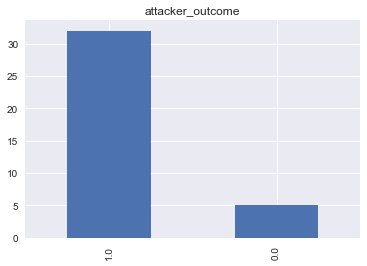

In [23]:
# 攻击方战胜与战败计数
df['attacker_outcome'].value_counts().plot(kind='bar',title='attacker_outcome');

**小结**：似乎是主动进攻，更易获胜

#### 3.1.3.2 攻守方力量差值散点图

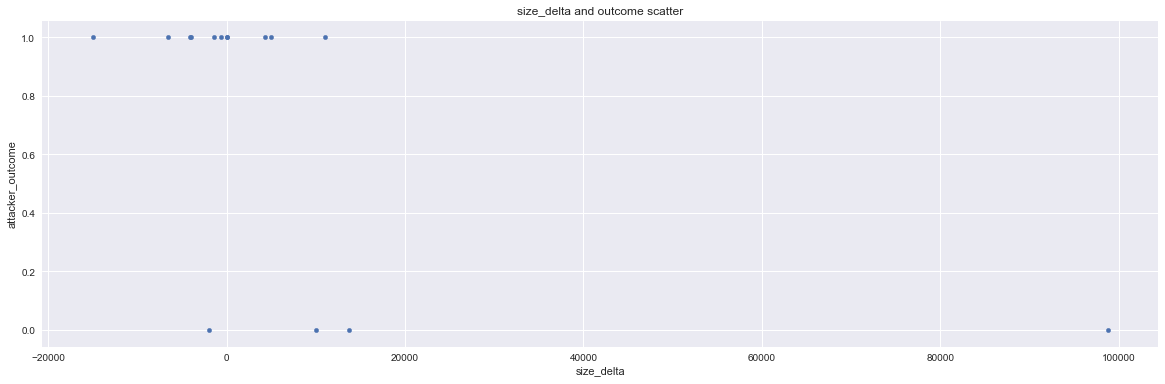

In [24]:
df.plot(x='size_delta',y='attacker_outcome',kind='scatter',figsize=(20,6),title='size_delta and outcome scatter');

**小结**：由于某个轴的数据是二元分类数据，这里散点图显示的相关性不是特别好。有个靠近100000的数值点，与其他数据间隔太远，我这里选择忽略，后面会单独分析这个异常点

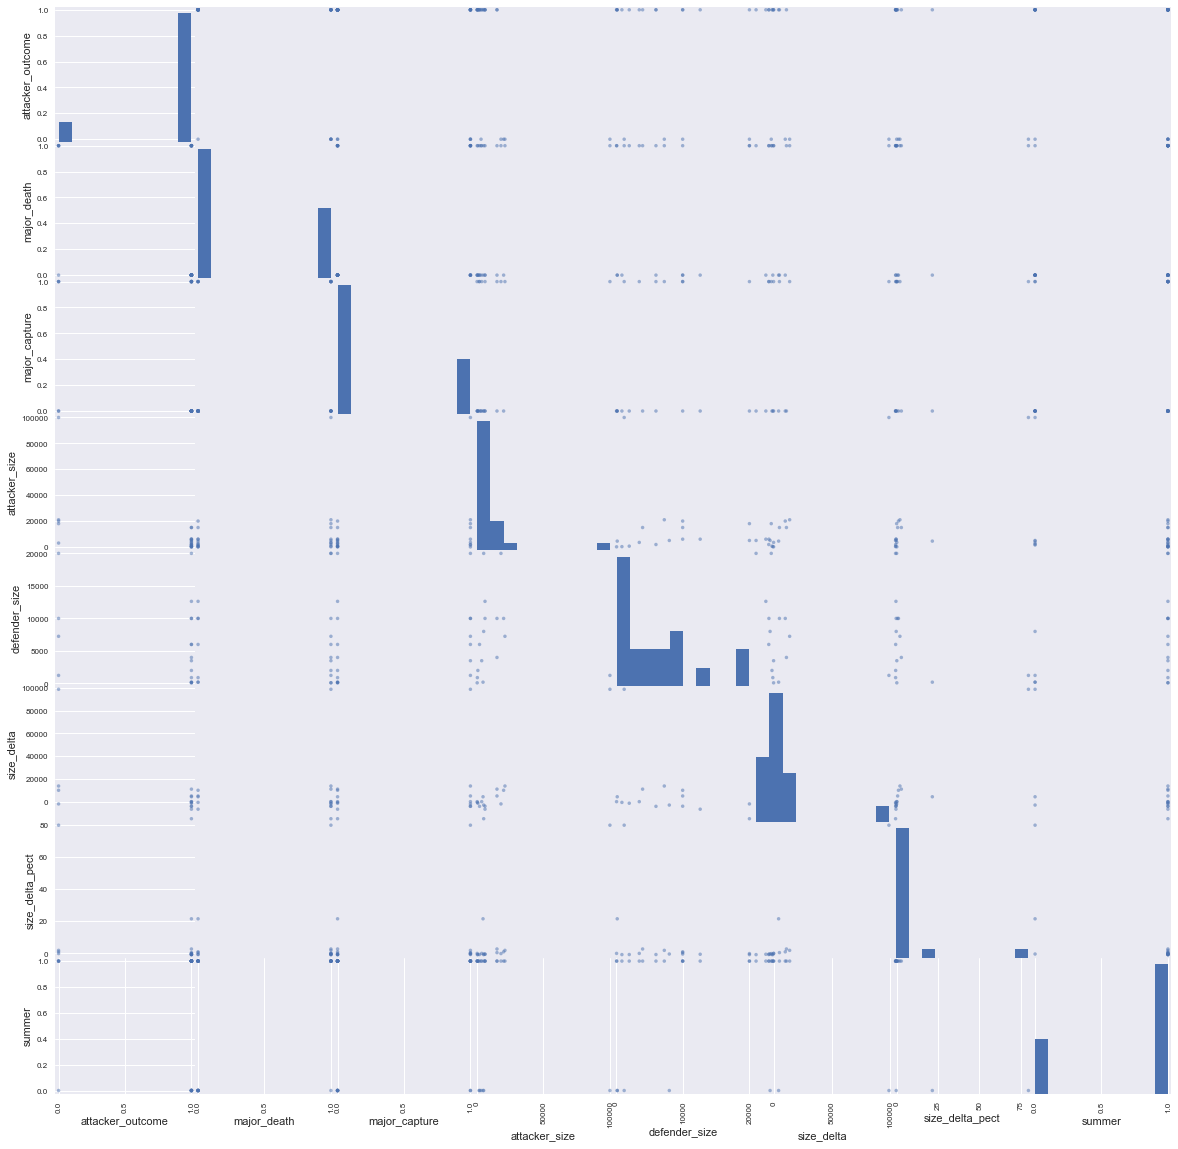

In [25]:
columns = ['attacker_outcome','major_death','major_capture',
           'attacker_size','defender_size','size_delta',
           'size_delta_pect','summer']
pd.plotting.scatter_matrix(df[columns],figsize=(20,20));

上图效果不大好，换用热力图

#### 3.1.3.3 相关性热力图

In [26]:
# 求取columns中对应的列之间两两相关系数
df_corr = df[columns][df.size_delta<20000].corr() # 除去size_delta靠近100000的这个异常点

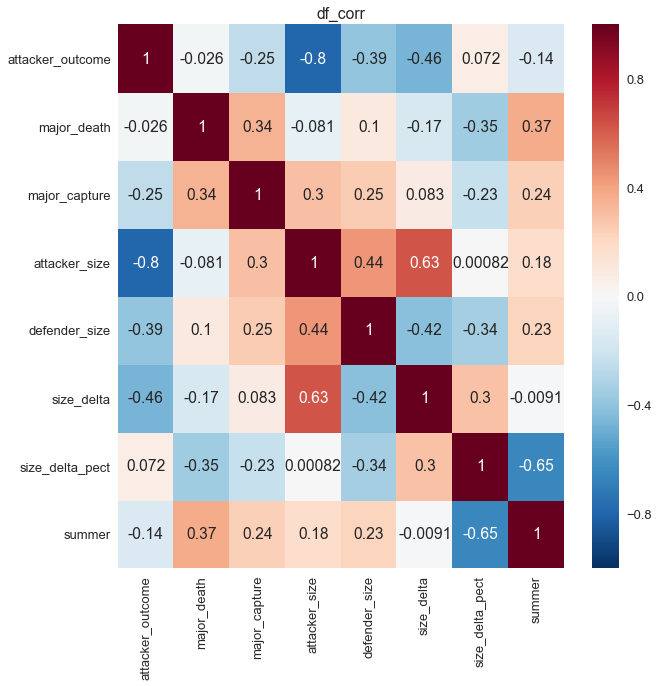

In [27]:
sns.set(font_scale=1.3) # 字体大小设置
fig = plt.figure(figsize=(10, 10)) # 图像区域大小
sns.heatmap(df_corr,annot=True) # annot=True是为了在每个小方块中注明对应的（相关性）数值
plt.title('df_corr')
plt.show() # 显示df_corr的热力图

这里我作一个相关性程度设定，相关性绝对值对应的相关性强度如下
#### 0.5-1.0，强相关
#### 0.3-0.5，中等相关
#### 0.1-0.3，弱相关
#### 0-0.1，无相关性

这里我们关注attacker_come，发现attacker_come与其他几列都是负相关的
其中，attacker_come 与attacker_size强负相关，
与 size_delat 和defender_size 中等负相关，
与major_death 和 summer 弱负相关，
与major_death 和size_delta_pect 无相关性

**小结**：从热力图数据可看出：兵力越少反而容易获胜。

这里，与常识相反的是，战胜居然是跟兵力负相关的，我觉得这个结论不大令人相信，
在我看来，得出这个（兵力越少反而容易获胜）结论是因为没有考虑到其他因素，而这些因素可能对战局的影响完全超过了兵力，才导致这个结果

### 3.2 哪个区域交战较多

In [28]:
# 这里我探索region
df.region.value_counts()

The Riverlands     17
The North          10
The Stormlands      3
The Westerlands     3
The Crownlands      2
The Reach           2
Beyond the Wall     1
Name: region, dtype: int64

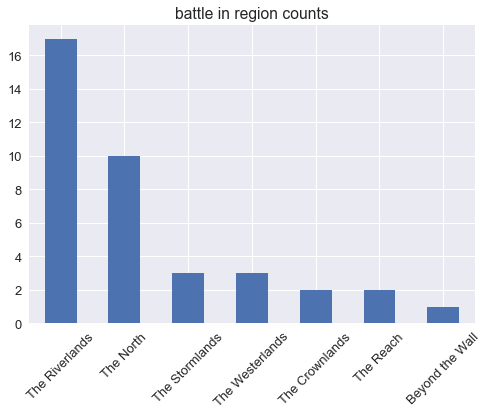

In [29]:
df.region.value_counts().plot(kind='bar',rot=45,title='battle in region counts');

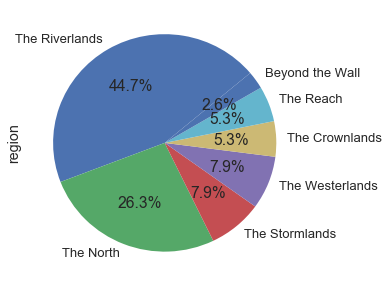

In [30]:
df.region.value_counts().plot(kind='pie',autopct='%.1f%%',startangle = 40,figsize=(5,5));

In [31]:
(17+10)/38

0.7105263157894737

**小结**：一共38场战役，其中 17场发生在 The Riverlans , 10场发生在 The North, 71%的战役发生于这两个地域

而最少的战役则是在 Beyond the Wall，只有一场，探索下该地域对应的战役数据

### 3.3 以少胜多的一场战役

In [32]:
df[df.region=='Beyond the Wall']

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,size_delta,size_delta_pect
27,Battle of Castle Black,300,28,Mance Rayder,Stannis Baratheon,Free folk,Thenns,Giants,NaN,Night's Watch,...,100000.0,1240.0,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",0.0,Castle Black,Beyond the Wall,NaN,98760.0,79.645161


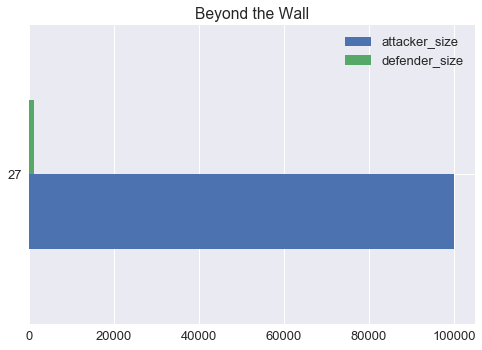

In [33]:
df[df.region=='Beyond the Wall'][['attacker_size','defender_size']].plot(kind='barh',title='Beyond the Wall');

In [34]:
df[df.region=='Beyond the Wall'][['attacker_size','defender_size','size_delta']].T

,27
attacker_size,100000.0
defender_size,1240.0
size_delta,98760.0


##### 在这一场战役中，在兵力相差98760如此悬殊的情况下，防御方居然还能获胜，让我感到好奇

查了下资料，这场战役，防御方位于城墙之上，占据制高点，一夫当关，万夫莫开。

该数据其实并不能详细的说明这场战争是如何获胜的，因为部分信息并不能很好的解释战役经过，像这场战役,
查资料，显示是分三段进行的

**南方突袭**：攻击方少量部队突袭，未果，但是攻击方主力部队毫发未损

**正面攻城**：防御方指挥官战死，但是同样伤到了对方指挥官

**长城决战**：擒获攻击方国王Mance Rayder，Mance Rayder队伍溃散，战斗结束

当然了，这场战役防御方的地理位置，起到了一个拖延时间消耗对方兵力的作用，在对方攻城时，弓箭兵，陷阱等消耗了对方大部分力量，最后防御方待援兵抵达，防御方转变为攻击方，最终战胜进攻方。

所以，我认为这场战役，获胜关键是防御方的地理位置

**小结**：某些战役中，地理优势和援兵会影响战役结局，完全大于兵力优势

### 3.4 作战方式以及对应胜率

In [35]:
df.battle_type.value_counts()

pitched battle    14
siege             11
ambush            10
razing             2
Name: battle_type, dtype: int64

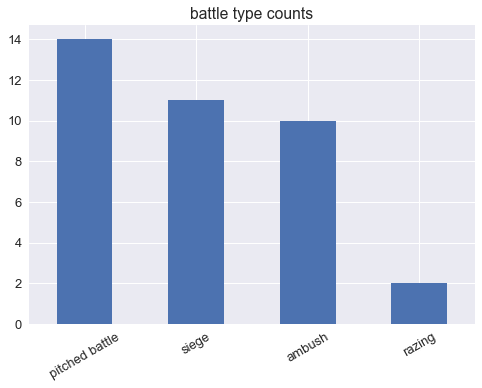

In [36]:
# 攻方作战方式数目
df.battle_type.value_counts().plot(kind='bar',rot=30, title='battle type counts');

In [37]:
# 作战方式与结局
df.groupby(['attacker_outcome','battle_type']).size()
# df.groupby('attacker_outcome').battle_type.value_counts()

attacker_outcome  battle_type   
0.0               pitched battle     4
                  siege              1
1.0               ambush            10
                  pitched battle    10
                  razing             2
                  siege             10
dtype: int64

In [38]:
# 作战方式胜率
attact_win = df.groupby('battle_type').sum().attacker_outcome
attact_total = df.groupby('battle_type').count().attacker_outcome
attact_win_rate = attact_win/attact_total
attact_win_rate

battle_type
ambush            1.000000
pitched battle    0.714286
razing            1.000000
siege             0.909091
Name: attacker_outcome, dtype: float64

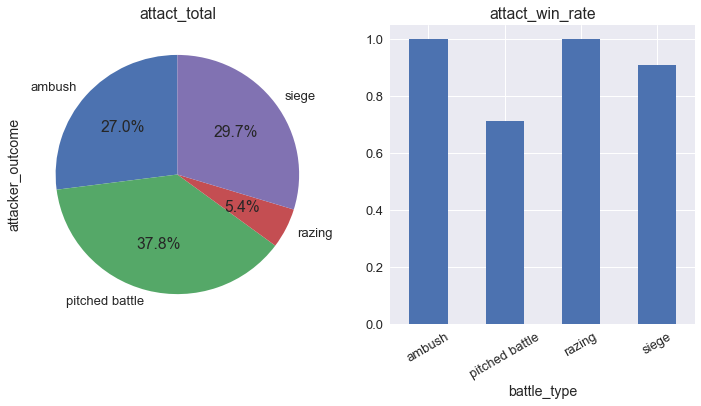

In [39]:
plt.figure(figsize = (12,5.5))
plt.subplot(121)
attact_total.plot(kind='pie', autopct='%.1f%%',startangle = 90)
plt.title('attact_total')

plt.subplot(122)
attact_win_rate.plot(kind='bar',rot=30)
plt.title('attact_win_rate')

plt.show()

ambush: 以隐身或诡计为主要攻击手段的战争；

razing: 对未设防位置的攻击；

siege: 阵地战；

pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别。

#### 上图也可看出，作战方式，采用ambush和razing全胜，其次是 siege,胜率90.9%，最后是pitched battle为71.4%

#### 对于采用ambush和razing战术的出击方，全胜，就我来看，这两种战术都是出其不意作战，容易取胜

#### 采用siege方式，这里相当于是围城（围攻）式作战，防御方被包围，围攻方拥有地理优势，更有优势获胜

#### 采用pitched_battle方式

相遇并激战，就是事先是没想到会遇上对方的，那么就是在作战方式上，攻击方并没有前三者有优势，胜率较前三种作战方式低。但是，既然发生战斗了，那么在战斗发生前，双方会估摸对方实力，选择是攻还是守，这里，我认为攻方是认为自己实力是要强势的，所以选择攻，守方认为自身实力弱势，所以选择守，那么在决战之前就有了一个实力对比，是攻是守大概率决定了胜负

**小结**：四种作战方式中，攻方采用ambush和razing获胜最高，其次是siege，最后是pitched battle

### 3.5 所有国王胜率

#### 3.5.1 攻击方获胜

In [40]:
# 攻击方获胜
attack_king_win = df.groupby('attacker_king').sum().attacker_outcome
attack_king_total = df.groupby('attacker_king').count().attacker_outcome
attack_king_win_rate = attack_king_win / attack_king_total

In [41]:
attack_king_total

attacker_king
Balon/Euron Greyjoy          7
Joffrey/Tommen Baratheon    14
Mance Rayder                 1
Robb Stark                  10
Stannis Baratheon            3
Name: attacker_outcome, dtype: int64

In [42]:
attack_king_win

attacker_king
Balon/Euron Greyjoy          7.0
Joffrey/Tommen Baratheon    13.0
Mance Rayder                 0.0
Robb Stark                   8.0
Stannis Baratheon            2.0
Name: attacker_outcome, dtype: float64

In [43]:
attack_king_win_rate

attacker_king
Balon/Euron Greyjoy         1.000000
Joffrey/Tommen Baratheon    0.928571
Mance Rayder                0.000000
Robb Stark                  0.800000
Stannis Baratheon           0.666667
Name: attacker_outcome, dtype: float64

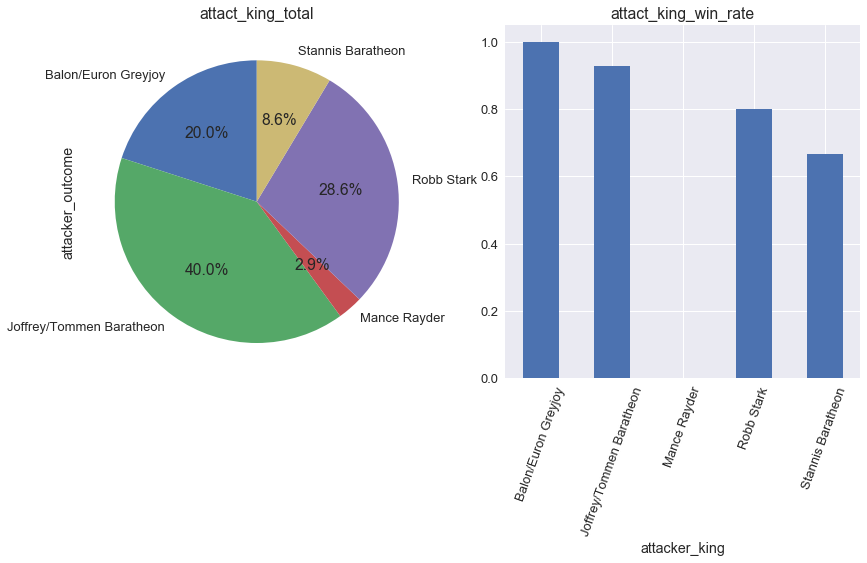

In [44]:
plt.figure(figsize = (14,6.5))
plt.subplot(121)
attack_king_total.plot(kind='pie', autopct='%.1f%%',startangle = 90)
plt.title('attact_king_total')

plt.subplot(122)
attack_king_win_rate.plot(kind='bar',rot=70)
plt.title('attact_king_win_rate')

plt.show()

#### 3.5.2 防御方获胜

In [45]:
# 防御方获胜
defender_king_total = df.groupby('defender_king').count().attacker_outcome
defender_king_win = defender_king_total - df.groupby('defender_king').sum().attacker_outcome

defender_king_win_rate = defender_king_win / defender_king_total

In [46]:
df.groupby(['defender_king','attacker_outcome']).size()

defender_king             attacker_outcome
Balon/Euron Greyjoy       1.0                  4
Joffrey/Tommen Baratheon  0.0                  3
                          1.0                  9
Renly Baratheon           1.0                  1
Robb Stark                0.0                  1
                          1.0                 13
Stannis Baratheon         0.0                  1
                          1.0                  2
dtype: int64

In [47]:
defender_king_win

defender_king
Balon/Euron Greyjoy         0.0
Joffrey/Tommen Baratheon    3.0
Renly Baratheon             0.0
Robb Stark                  1.0
Stannis Baratheon           1.0
Name: attacker_outcome, dtype: float64

In [48]:
defender_king_win_rate

defender_king
Balon/Euron Greyjoy         0.000000
Joffrey/Tommen Baratheon    0.250000
Renly Baratheon             0.000000
Robb Stark                  0.071429
Stannis Baratheon           0.333333
Name: attacker_outcome, dtype: float64

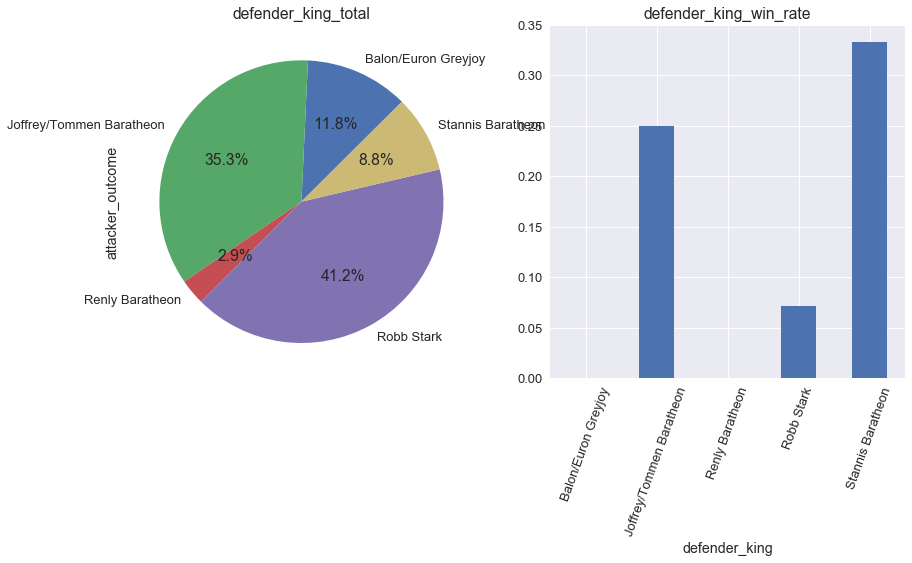

In [49]:
plt.figure(figsize = (14,6.5))
plt.subplot(121)
defender_king_total.plot(kind='pie', autopct='%.1f%%',startangle = 45)
plt.title('defender_king_total')

plt.subplot(122)
defender_king_win_rate.plot(kind='bar',rot=70)
plt.title('defender_king_win_rate')

plt.show()

#### 3.5.3 哪个国王的胜率最高

In [50]:
# 攻击方获胜
attack_king_win

attacker_king
Balon/Euron Greyjoy          7.0
Joffrey/Tommen Baratheon    13.0
Mance Rayder                 0.0
Robb Stark                   8.0
Stannis Baratheon            2.0
Name: attacker_outcome, dtype: float64

In [51]:
# 防御方获胜
defender_king_win

defender_king
Balon/Euron Greyjoy         0.0
Joffrey/Tommen Baratheon    3.0
Renly Baratheon             0.0
Robb Stark                  1.0
Stannis Baratheon           1.0
Name: attacker_outcome, dtype: float64

In [52]:
# 各个国王战役胜利局数及其对应胜率
battle_win = attack_king_win.add(defender_king_win, fill_value=0)
battle_total = attack_king_total.add(defender_king_total, fill_value=0)
battle_win_rate = battle_win / battle_total

In [53]:
# 各个国王战役胜利局数
battle_win

Balon/Euron Greyjoy          7.0
Joffrey/Tommen Baratheon    16.0
Mance Rayder                 0.0
Renly Baratheon              0.0
Robb Stark                   9.0
Stannis Baratheon            3.0
Name: attacker_outcome, dtype: float64

In [54]:
# 各个国王战役总局数
battle_total

Balon/Euron Greyjoy         11.0
Joffrey/Tommen Baratheon    26.0
Mance Rayder                 1.0
Renly Baratheon              1.0
Robb Stark                  24.0
Stannis Baratheon            6.0
Name: attacker_outcome, dtype: float64

In [55]:
# 各个国王战役胜率
battle_win_rate

Balon/Euron Greyjoy         0.636364
Joffrey/Tommen Baratheon    0.615385
Mance Rayder                0.000000
Renly Baratheon             0.000000
Robb Stark                  0.375000
Stannis Baratheon           0.500000
Name: attacker_outcome, dtype: float64

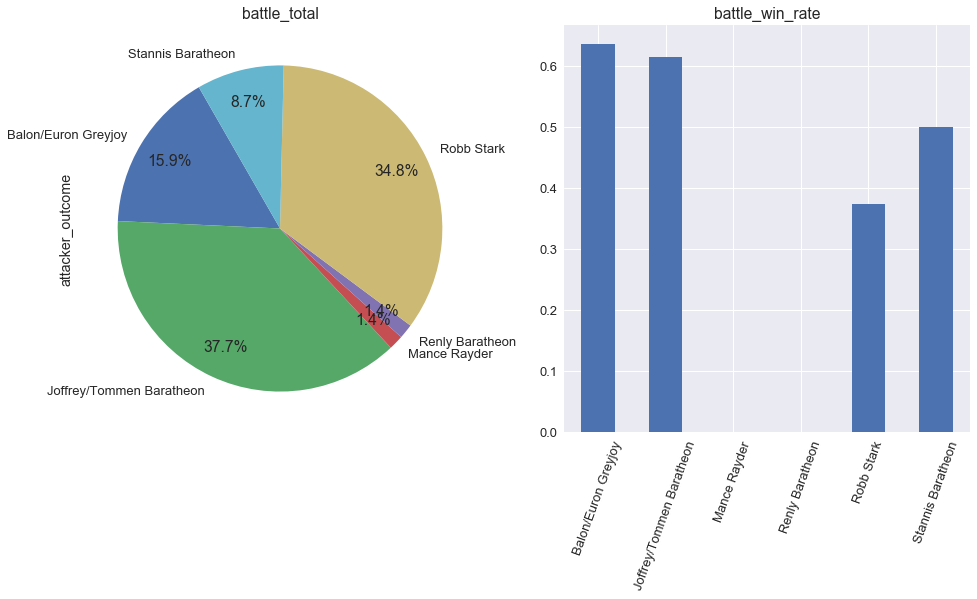

In [56]:
plt.figure(figsize = (16,7.5))
plt.subplot(121)
battle_total.plot(kind='pie', autopct='%.1f%%',startangle = 120,pctdistance = 0.8)
plt.title('battle_total')

plt.subplot(122)
battle_win_rate.plot(kind='bar',rot=70)
plt.title('battle_win_rate')

plt.show()

In [57]:
frame = pd.DataFrame({'battle_total':battle_total,
                      'battle_win_rate':battle_win_rate,
                      'battle_win':battle_win})
frame.sort_values(by='battle_win_rate', ascending=False)

,battle_total,battle_win,battle_win_rate
Balon/Euron Greyjoy,11.0,7.0,0.636364
Joffrey/Tommen Baratheon,26.0,16.0,0.615385
Stannis Baratheon,6.0,3.0,0.500000
Robb Stark,24.0,9.0,0.375000
Mance Rayder,1.0,0.0,0.000000
Renly Baratheon,1.0,0.0,0.000000


**小结**：

6个国王中，胜率前三分别是 Balon/Euron Greyjoy，Joffrey/Tommen Baratheon以及Stannis Baratheon	
对应胜率分别为 63.6%，61.5%，50.0%

## 4、得出结论

**问题**：攻防双方力量是否影响战局

**答案**：这里数据显示是强负相关，即：兵力越少，越容易获胜，这个结论不太令人信服，原因是未考虑到其他因素的影响大于兵力（作战斗方式，防御方地理位置等）

**问题**：哪个区域交战较多？

**答案**：一共38场战役，其中 17场发生在 The Riverlans , 10场发生在 The North, 71%的战役发生于这两个地域，而最少的战役则是在 Beyond the Wall，只有一场

**问题**：以少胜多的一场战役？

**答案**：Battle of Castle Black

攻方兵力碾压防御方兵力，依然战败，原因是，防御方占据一个很好的地理位置来抵御进攻，且等到援兵到来，一举击溃敌军。

**问题**：作战方式以及对应胜率

**答案**：四种作战方式中，攻方采用ambush和razing全胜，其次是 siege,胜率90.9%，最后是pitched battle为71.4%

**问题**：所有国王的胜率

**答案**：6个国王中，胜率前三分别是 Balon/Euron Greyjoy，Joffrey/Tommen Baratheon以及Stannis Baratheon
对应胜率分别为 63.6%，61.5%，50.0%，Robb Stark为37.5%，而Mance Rayder和Renly Baratheon则为0%	

## 5、反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：

**1**：这里我对攻防双方力量是否影响战局这个问题探索的并不是很好，原因如下

1.1 数据量较少

    只有38行数据，而攻守方兵力均有的数据只有16行

1.2 未规避其他因素

    因为要确定这个因素，最好是保证其他因素不变，而其它因素，比如交战双方的指挥官，将领，我并未去对比分析

**2**：在一开始未想到一种较好的方式来填充缺失值

**3**：未能完全探索

    未能比对指挥官，将领，重要人物这些信息



恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。

## 6、参考资料

#### http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
#### http://asoiaf.huijiwiki.com/index.php?curid=4506
#### 泰坦尼克号数据探索：https://zhuanlan.zhihu.com/p/32582696
#### 利用python进行数据分析